In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import os

In [18]:
base_path = "/content/PLD_3_Classes_256"

train_path = f"{base_path}/Training"
val_path   = f"{base_path}/Validation"
test_path  = f"{base_path}/Testing"

In [19]:
IMG_SIZE = 224
BATCH_SIZE = 32
SEED = 42

train_ds = image_dataset_from_directory(
    train_path,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED
)

val_ds = image_dataset_from_directory(
    val_path,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_ds = image_dataset_from_directory(
    test_path,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 3251 files belonging to 3 classes.
Found 416 files belonging to 3 classes.
Found 405 files belonging to 3 classes.


In [20]:
print("Classes:", train_ds.class_names)


Classes: ['Early_Blight', 'Healthy', 'Late_Blight']


In [21]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)
test_ds = test_ds.prefetch(AUTOTUNE)

data_augmentation = Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

In [22]:
base_model = MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False   # freeze conv layers

mobilenet_model = Sequential([
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(3, activation="softmax")
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [23]:
mobilenet_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [24]:
history = mobilenet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=12
)

Epoch 1/12
102/102 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.6674 - loss: 0.8039 - val_accuracy: 0.9327 - val_loss: 0.2298
Epoch 2/12
102/102 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.8666 - loss: 0.3429 - val_accuracy: 0.9255 - val_loss: 0.1980
Epoch 3/12
102/102 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.8857 - loss: 0.3098 - val_accuracy: 0.9447 - val_loss: 0.1651
Epoch 4/12
102/102 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.8806 - loss: 0.2980 - val_accuracy: 0.9038 - val_loss: 0.2223
Epoch 5/12
102/102 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.8949 - loss: 0.2700 - val_accuracy: 0.8942 - val_loss: 0.2430
Epoch 6/12
102/102 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.9078 - loss: 0.2453 - val_accuracy: 0.9519 - val_loss: 0.1601
Epoch 7/12
102/102 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.9146 - loss: 0.2357 - val_accuracy: 0.9471 - val_loss: 0.1591
Epoch 8/12
102/102 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.9057 - loss: 0.2421 - val_accu

In [25]:
mobilenet_model.save("mobilenet_v12.h5")

In [26]:
from tensorflow.keras.models import load_model
mobilenet_model = load_model("mobilenet_v12.h5")

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True, monitor="val_loss"),
    ReduceLROnPlateau(patience=3, factor=0.3, monitor="val_loss"),
    ModelCheckpoint("mobilenet_best.h5", save_best_only=True, monitor="val_accuracy")
]


In [29]:
import numpy

In [32]:
model2 = tf.keras.models.load_model("/content/mobilenet_v12.h5")

tf.config.run_functions_eagerly(True)

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history2 = model2.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 376s 4s/step - accuracy: 0.9156 - loss: 0.2250 - val_accuracy: 0.9519 - val_loss: 0.1466
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 337s 3s/step - accuracy: 0.9261 - loss: 0.2012 - val_accuracy: 0.9255 - val_loss: 0.1923
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 338s 3s/step - accuracy: 0.9170 - loss: 0.2196 - val_accuracy: 0.9399 - val_loss: 0.1687
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 371s 3s/step - accuracy: 0.9170 - loss: 0.2131 - val_accuracy: 0.9423 - val_loss: 0.1550
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 331s 3s/step - accuracy: 0.9173 - loss: 0.2175 - val_accuracy: 0.9423 - val_loss: 0.1424
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.9163 - loss: 0.2209 - val_accuracy: 0.9351 - val_loss: 0.1671
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 335s 3s/step - accuracy: 0.9232 - loss: 0.1964 - val_accuracy: 0.9375 - val_loss: 0.1528
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 374s 3s/step - accuracy: 0.9130 - loss: 0.2212 - val_accu

In [33]:
mobilenet_model.save("FA2_Model1_MobileNetV2_Final.h5")

In [34]:
from tensorflow.keras.models import load_model

model = load_model("FA2_Model1_MobileNetV2_Final.h5")

In [35]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 901ms/step - accuracy: 0.9326 - loss: 0.2003
Test Accuracy: 0.9506173133850098
Test Loss: 0.15936309099197388


13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 977ms/step


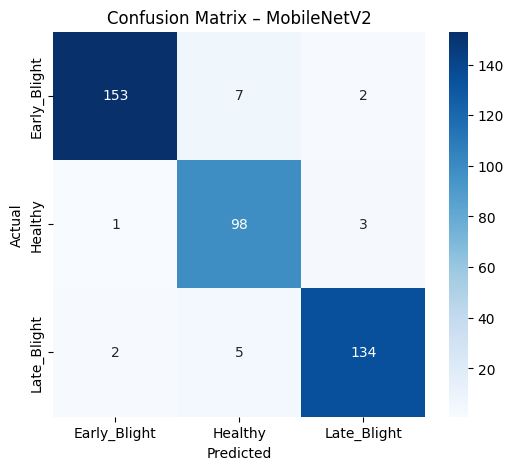

In [37]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class_names = ["Early_Blight", "Healthy", "Late_Blight"]

# True labels
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Predictions
pred_probs = model.predict(test_ds)
y_pred = np.argmax(pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – MobileNetV2")
plt.show()

In [39]:
from sklearn.metrics import classification_report

class_names = ["Early_Blight", "Healthy", "Late_Blight"]

print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))

              precision    recall  f1-score   support

Early_Blight       0.98      0.94      0.96       162
     Healthy       0.89      0.96      0.92       102
 Late_Blight       0.96      0.95      0.96       141

    accuracy                           0.95       405
   macro avg       0.95      0.95      0.95       405
weighted avg       0.95      0.95      0.95       405



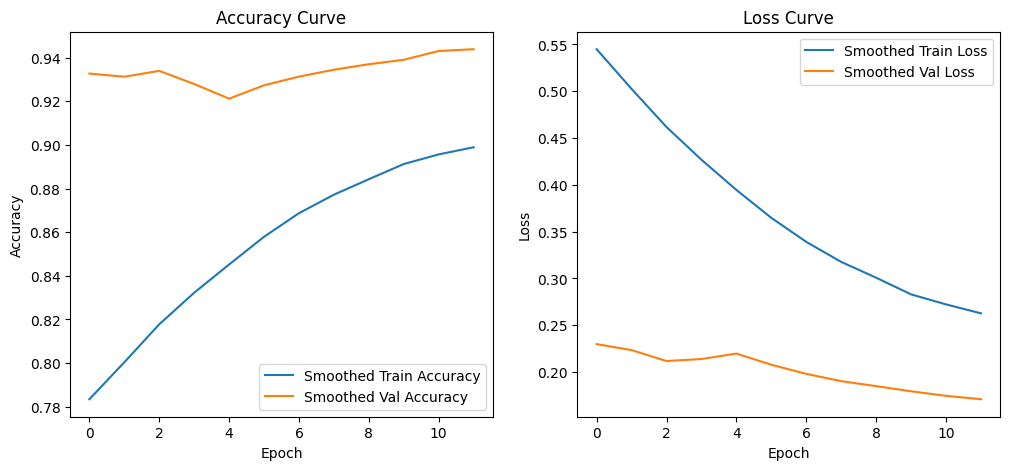

In [40]:
import matplotlib.pyplot as plt
import numpy as np

def smooth_curve(points, factor=0.8):
    smoothed = []
    for p in points:
        if smoothed:
            smoothed.append(smoothed[-1] * factor + p * (1 - factor))
        else:
            smoothed.append(p)
    return smoothed

# Smooth curves
acc      = smooth_curve(history.history['accuracy'])
val_acc  = smooth_curve(history.history['val_accuracy'])
loss     = smooth_curve(history.history['loss'])
val_loss = smooth_curve(history.history['val_loss'])

plt.figure(figsize=(12,5))

# Accuracy Curve
plt.subplot(1,2,1)
plt.plot(acc, label='Smoothed Train Accuracy')
plt.plot(val_acc, label='Smoothed Val Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss Curve
plt.subplot(1,2,2)
plt.plot(loss, label='Smoothed Train Loss')
plt.plot(val_loss, label='Smoothed Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [41]:
from tensorflow.keras.preprocessing import image
import numpy as np

class_names = ["Early_Blight", "Healthy", "Late_Blight"]

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    img_arr = image.img_to_array(img)
    img_arr = np.expand_dims(img_arr, axis=0) / 255.0

    pred = model.predict(img_arr)
    class_id = np.argmax(pred)
    conf = np.max(pred)

    print("Predicted:", class_names[class_id])
    print("Confidence:", round(conf * 100, 2), "%")

In [42]:
predict_image("/content/PLD_3_Classes_256/Testing/Healthy/Healthy_10.jpg")

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
Predicted: Healthy
Confidence: 99.2 %


In [43]:
import pandas as pd

results = []

for imgs, labels in test_ds:
    preds = model.predict(imgs)
    preds_cls = np.argmax(preds, axis=1)
    results.extend(preds_cls)

df = pd.DataFrame({
    "True_Label": y_true,
    "Predicted_Label": results
})

df.to_csv("mobilenet_predictions.csv", index=False)
print("CSV saved!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 894ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step
CSV saved!
